# **GeoDiscovery: Exploratory Analysis of Geolocational Data**

### Project by Gautam Rai, Mradul Gupta, Shiwangita Singh
---
## Introduction
This project is focused on analyzing geolocational data to recommend accommodations to immigrants in a city, such as Bangalore. The goal is to use K-Means Clustering on datasets to classify accommodation for incoming students based on their preferences, including amenities, budget, and proximity to certain locations.

### Objectives:
- **Data Fetching & Cleaning**
- **Data Exploration & Visualization**
- **K-Means Clustering**
- **Geolocational Data Collection**
- **Final Presentation**

---
## Task 1: Data Preparation
The first step is to fetch the datasets, clean them, and prepare them for further analysis. The dataset will be read using `pandas` and unnecessary columns will be removed. This process is crucial to ensure that the analysis is efficient and accurate.


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the dataset
df=pd.read_csv("food_coded.csv")
df.shape

(125, 61)

In [5]:
# Quick overview of the dataset
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [6]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

### Data Cleaning 
Dropping irrelevant columns, duplicated values and handling NaN values

In [8]:
columns_to_remove=['GPA', 'Gender','breakfast','calories_chicken','calories_day','calories_scone','coffee','comfort_food','comfort_food_reasons','comfort_food_reasons_coded','comfort_food_reasons_coded.1','cuisine','diet_current','diet_current_coded','drink','eating_changes','eating_changes_coded','eating_changes_coded1','father_education','father_profession','fav_cuisine','fav_cuisine_coded','fav_food','food_childhood','fries','grade_level','greek_food','healthy_feeling','healthy_meal','ideal_diet','ideal_diet_coded','indian_food','italian_food','life_rewarding','marital_status','meals_dinner_friend','mother_education','mother_profession','nutritional_check','parents_cook','persian_food','self_perception_weight','soup','thai_food','tortilla_calories','turkey_calories','type_sports','vitamins','waffle_calories','weight']
df=df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [9]:
# Checking for NULL values
df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [10]:
# Handling Null values
df=df.fillna(0)
df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [11]:
df.duplicated().sum()

0

The dataset is now ready for further analysis.

---

## Task 2: Data Exploration and Visualization
In this step, we will explore the dataset using descriptive statistics and visualize it using box plots to gain insights into the distribution of various parameters.

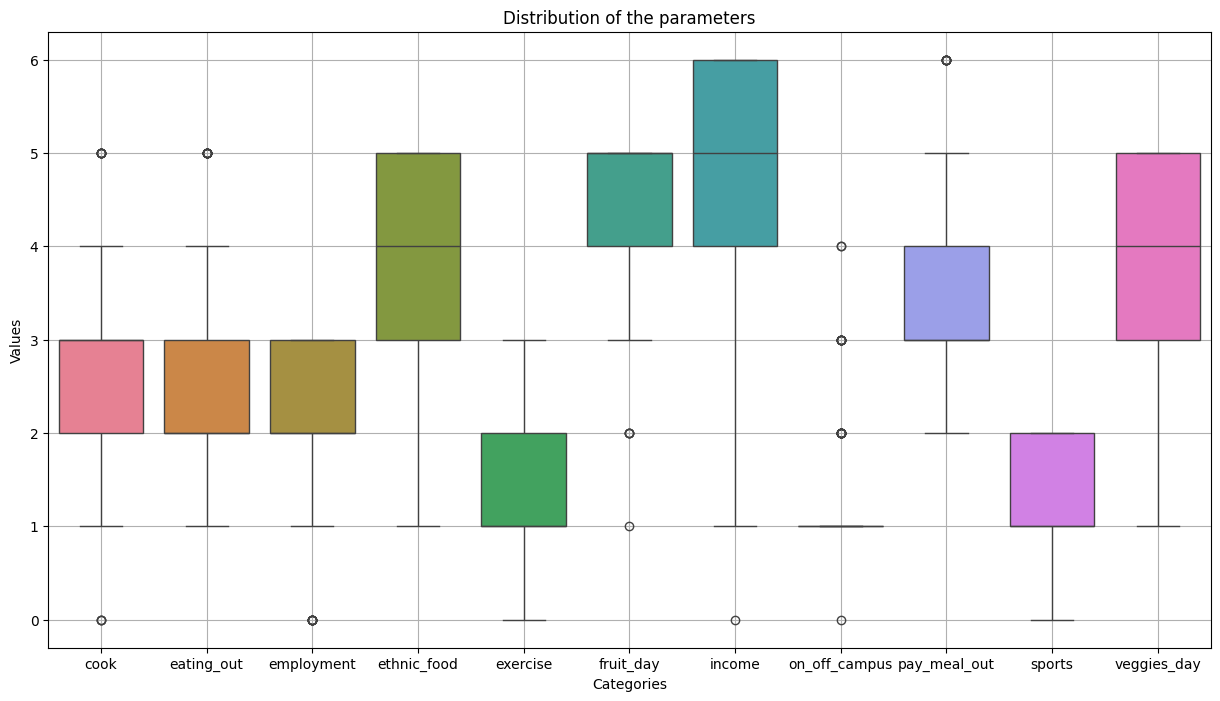

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Distribution of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.grid(True)
plt.show()

**Insights from Box Plot:**
- **Cook**: The majority of people cook 2- A couple of times a week or 3 - Whenever they can, but that is not very often  
- **Eating_out**: Majority of people eat out 2- 1 to 2 times or 3- 2 to 3 times 
- **Employment**: Most of the people are doing 2- part time job or 3- no job
- **Ethnic_food**: Among (1- very unlikely, 2- unlikely, 3- neutral, 4- likely, 5- very likely) most people choose 2,3,4.
- **Exercise**: Majority of people do exercise 1- Everyday 2- Twice or three times per week.
- **Fruit_day**: Most of the people 4- likely or 5- very likely to eat fruit in a regular day. 
- **Income**: Majority of people having income more than $50,000.
  
- **on_off_campus – living situation**: Almost everyone living in campus.
- **pay_meal_out - Amount they would pay for meal out**: Majority pays 10 to 30 dollars.
  
- **Sports**: It's equally likely to happen they do sport or not.
- **Veggies_day**: Majority lies in between [2- unlikely, 3- neutral, 4- likely].

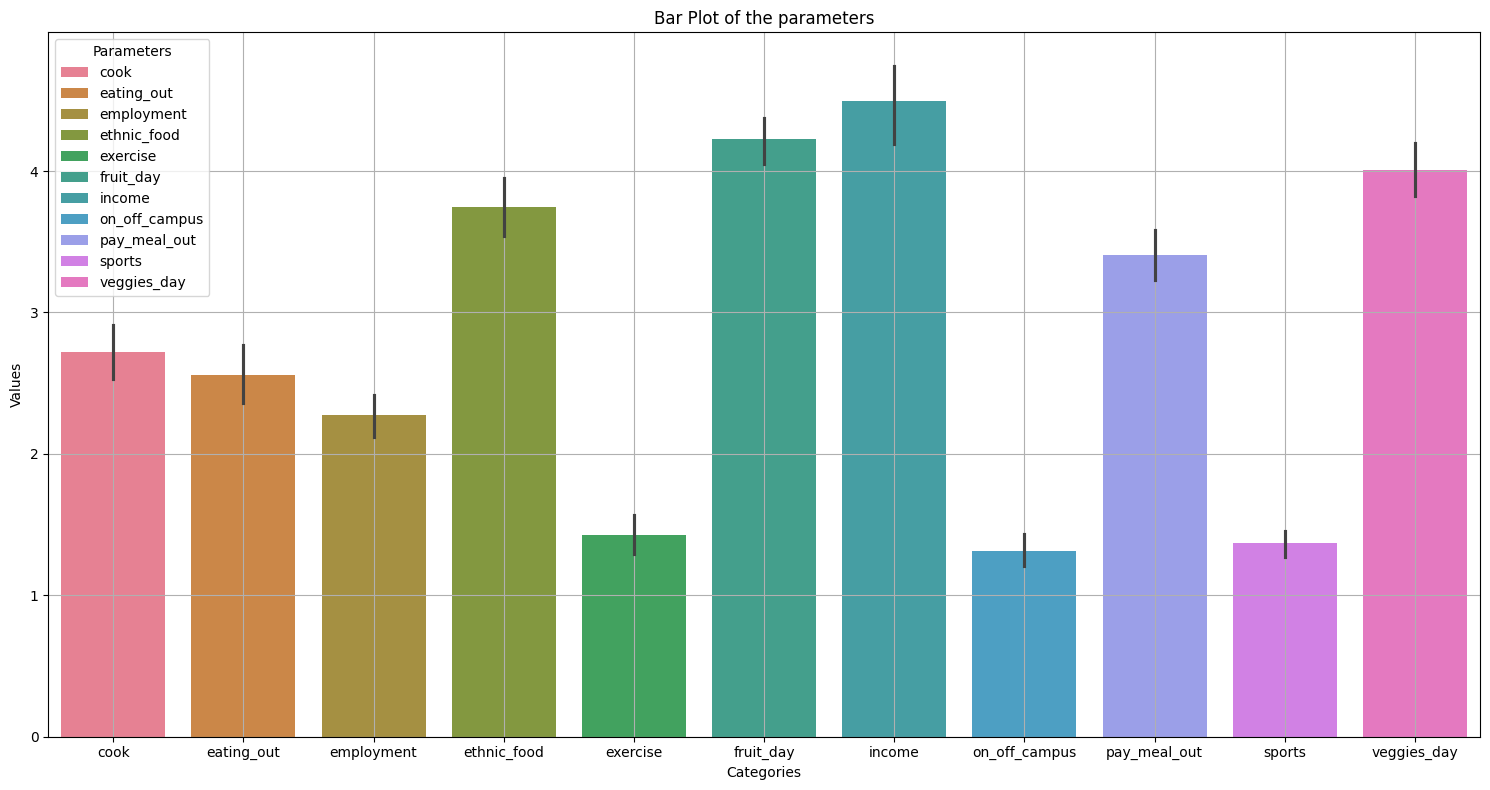

In [13]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df, legend=True)
plt.title('Bar Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
ax.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Task 3: K-Means Clustering
K-Means clustering is used to group locations based on various features such as income, exercise habits, and food preferences. The optimal number of clusters, `K`, will be determined through experimentation.

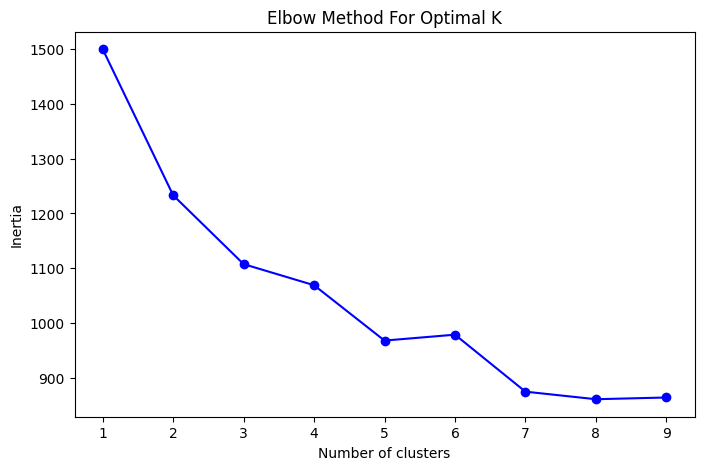

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Finding the optimal K
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# # Applying KMeans with the optimal K (Assume K=3 for this example)
# kmeans = KMeans(n_clusters=3)
# df['Cluster'] = kmeans.fit_predict(scaled_data)

# # Visualize clusters
# sns.pairplot(df, hue='Cluster')
# plt.show()